# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 3

**Правила:**

* Выполненную работу нужно отправить телеграм-боту, адрес которого будет указан на странице курса до конца недели. Обращаем ваше внимание, что в боте необходимо заранее зарегистрироваться и дождаться подтверждения.
* Дедлайн **7 ноября в 22:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb` 
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.

-----

*Обратите внимание, что во всех заданиях нашего курса, да и в реальной жизни, если вы получаете какие-то результаты, то надо сделать вывод!*

# Задача 1

1) Докажите, что критерий Джини равен вероятности ошибки случайного
классификатора, который выдаёт предсказания с вероятностями пропорционально
доле классов в выборке.

2) Выведите вид критерия информативности и найдите ответ в листе дерева для функции потерь $L(y, c) = (y-c)^2$ (см. лекцию).

1) Пусть у нас есть случайный классификатор, который выдаёт предсказания с вероятностями пропорционально доле классов в выборке. Посмотрим на вероятность выдать этому объекту другой класс:
$$P_i = P(y_i|x_{j\neq i}) = \dfrac{P(x_{j\neq i}|y_i)P(y_i)}{P(x_{j\neq i})} = (1-p_i) p_i$$
Эти события происходят независимо друг от друга, поэтому вероятность ошибки такого классификатора

$$H(X) = \sum_{k=1}^K P_i = \sum_{k=1}^K  (1-p_k) p_k.$$
Что и требовалось доказать.
2) Критерий информативности 
$$H(x) = \min_{c\in Y} \dfrac{1}{|X|} \sum_{x_i\in X} (y_i-c)^2$$
Найдем с:
$$\dfrac{d \left( \dfrac{1}{|X|} \sum_{x_i\in X} (y-c)^2 \right)}{dc} = \dfrac{2}{|X|} \sum_{x_i\in X} (c-y_i) =0 \Rightarrow \newline \Rightarrow  c = \dfrac{1}{|X|} \sum_{x_i\in X} y_i = \bar{y}  $$
Соответственно критерий информативности равен:
$$H(x) = \dfrac{1}{|X|} \sum_{x_i\in X} (y_i-\bar{y})^2$$

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)
%matplotlib inline

from statsmodels.api import Logit
from sklearn.model_selection import train_test_split

from sklearn.datasets import fetch_california_housing

from sklearn.ensemble import RandomForestRegressor
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings("ignore")

# Задача 2

(a) Скачайте данные предсказания пульсаров по [ссылке](https://www.kaggle.com/colearninglounge/predicting-pulsar-starintermediate). Описание данных можно вспомнить, посмотрев второе домашнее задание прошлого семестра. Будем использовать только файл train.



In [12]:
df = pd.read_csv('pulsar_data_train.csv')

df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


(b) Проведите визуальный анализ данных. Например, можете построить оценки плотности по каждому признаку
отдельно для каждого класса. 
 В прошлом семестре мы также научились много всего делать. Какие признаки лучше всего разделяют классы?

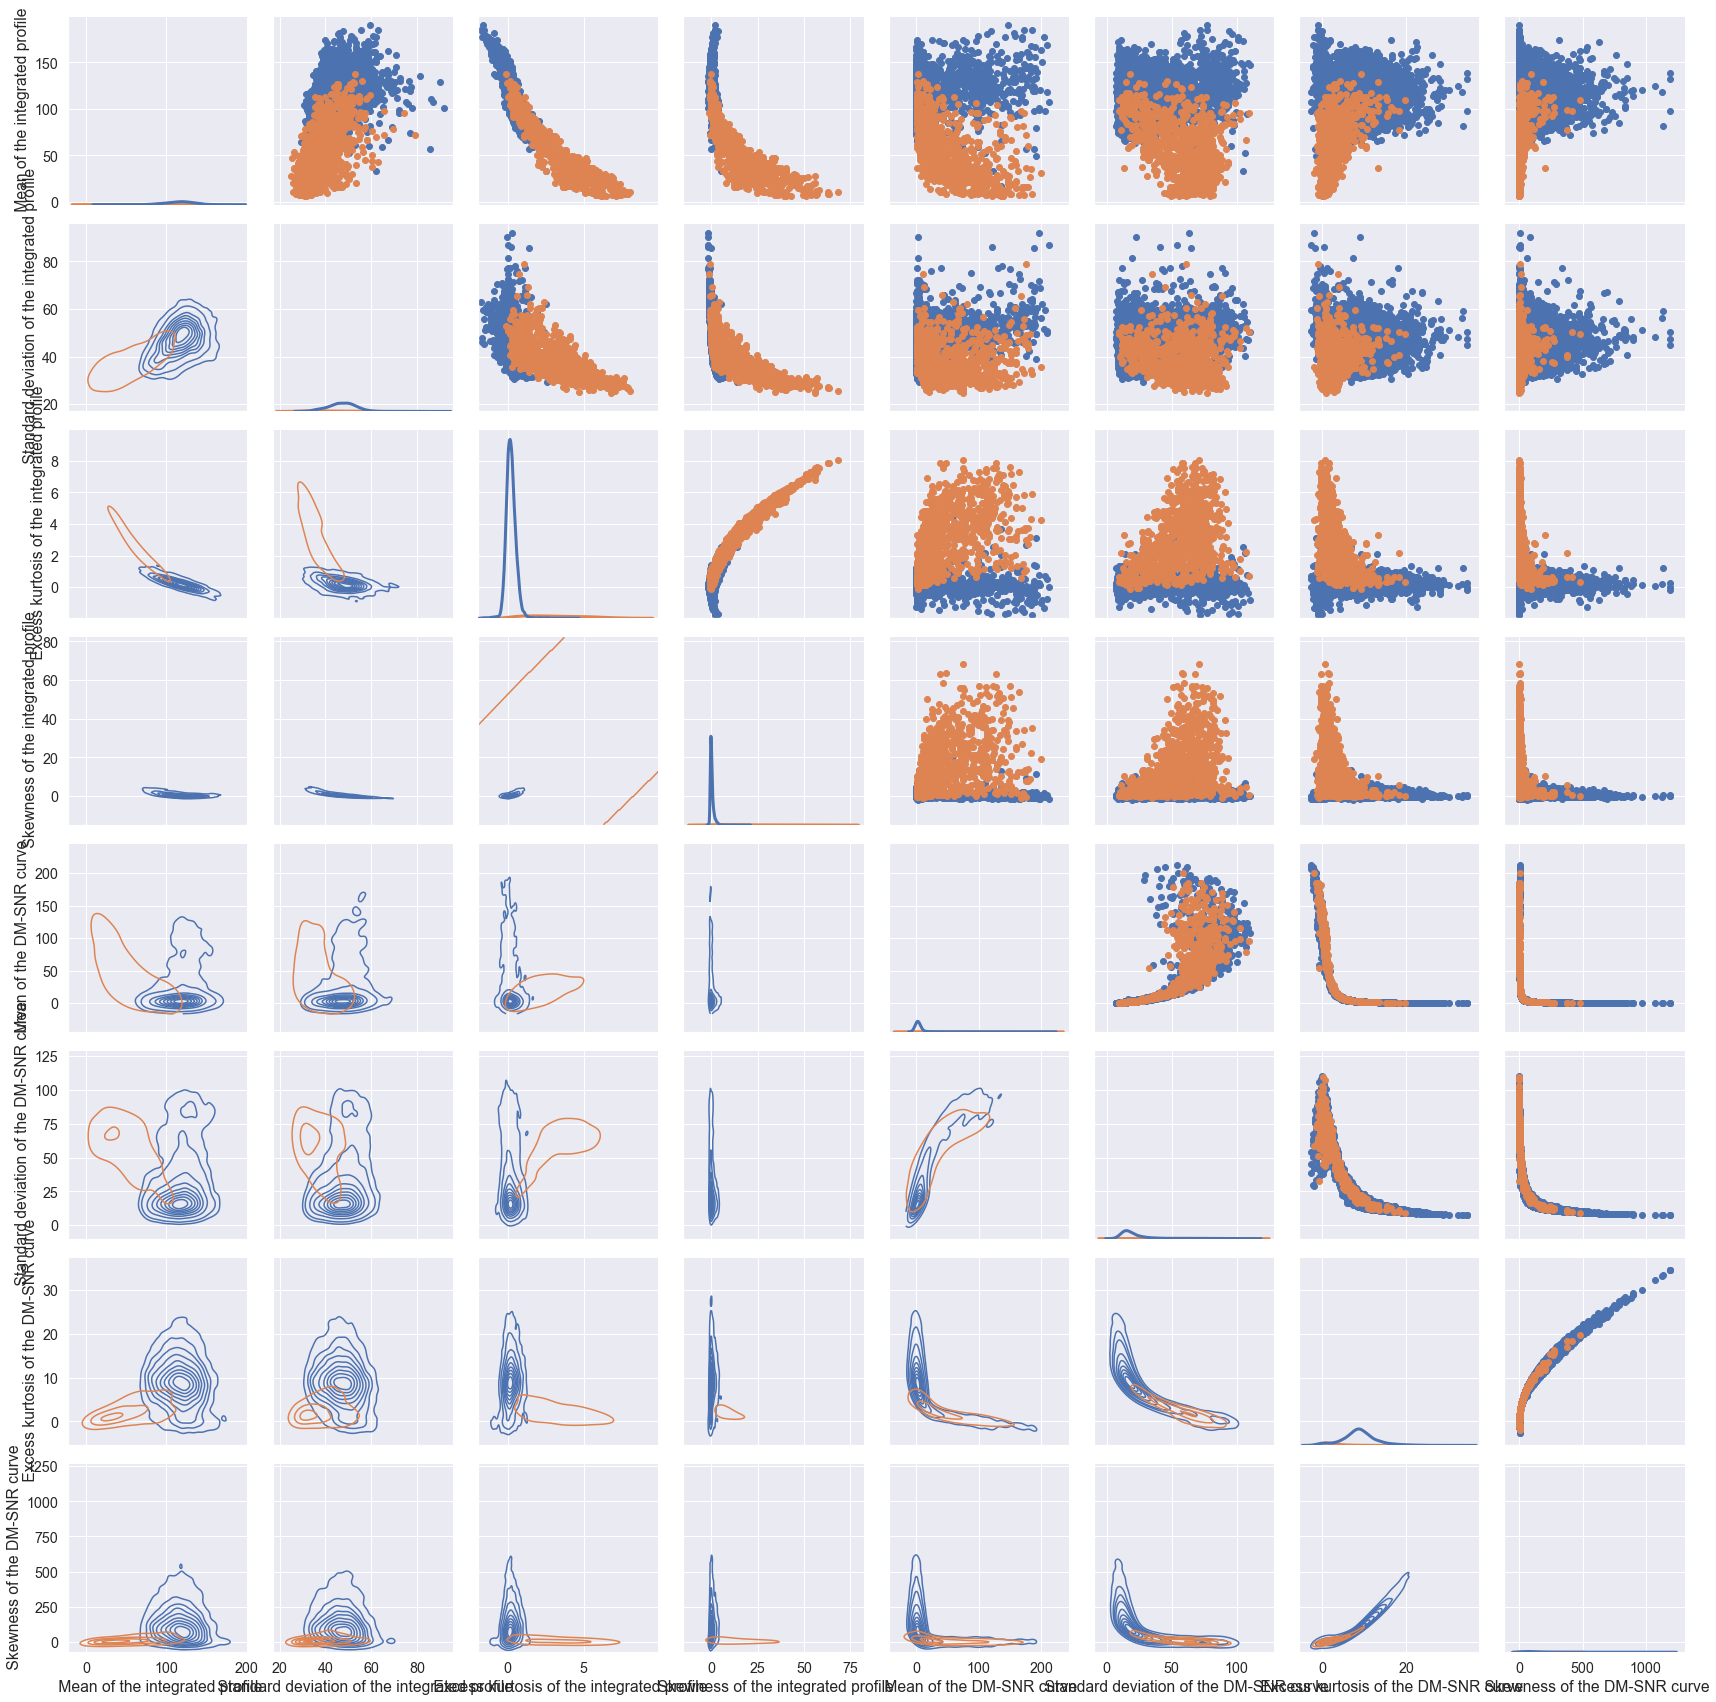

In [248]:
g = sns.PairGrid(df.dropna(), hue='target_class' , height=3)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

**Вывод** Как видно по ядерным оценкам плотности есть признаки, которые характеры только одному классу(третий к примеру), но смотря на них одновременно(поддиагональная часть матрицы) они также разделяют 2 класса довольно хорошо.

В данных есть пропуски. Сколько их? Уберите данные с пропусками или примените методы работы с пропусками. Их мы затронем на лекции. 

In [249]:
#Посмотрим на процент пропусков:
(df.shape[0] - df.dropna().shape[0])/ df.shape[0] 

0.25981800766283525

26% пропусков -- много, поэтому методы работы с пропусками необходимы.

(c) Добавьте  свободный член.   Разделите выборку на обучающую и тестовую часть случайным образом в соотношении 4:1.

In [275]:
df['Свободный член'] = np.ones(df.shape[0])

df_train, df_test = train_test_split(df.dropna(), test_size=0.2)

In [280]:
X_train, y_train = df_train.drop('target_class',1), df_train['target_class'].to_numpy()

X_test, y_test = df_test.drop('target_class',1), df_test['target_class'].to_numpy()

(d)  Обучите логистическую регрессию по всем признакам.  Используйте класс `Logit` из `statsmodels`, так как он позволит также проверить гипотезы незначимости модели и признаков, как в случае линейной регресии. Мы не проходили это в теории, но так можно делать:)). При использовании обратите внимание на его интерфейс. 

In [313]:
log_reg = Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.076773
         Iterations 9


Напечатайте `summary` модели. Вид `summary` похож на таблицу для линейной регрессии (см. лекцию про нее). Что можно сказать про признаки? 

In [314]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 7418
Model:                          Logit   Df Residuals:                     7409
Method:                           MLE   Df Model:                            8
Date:                Sun, 07 Nov 2021   Pseudo R-squ.:                  0.7461
Time:                        21:53:39   Log-Likelihood:                -569.50
converged:                       True   LL-Null:                       -2242.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
 Mean of the integrated profile                   0.0264      0.009      2.968      0.003       0.009       0.044
 Standard deviation of the

(e) Оставьте только значимые признаки *(как это правильно сделать?)*, обучите модель еще раз и проинтерпретируйте полученные
результаты. Какой смысл имеют коэффициенты модели?

Колонка $P>|z|$ -- p-value об отвержении гипотезы, что признак не важен, следоваетльно можно сказать какие признаки важны:
1) Свободный член

2) Standard deviation of the DM-SNR curve  

3) Skewness of the integrated profile

4) Excess kurtosis of the integrated profile

5) Mean of the integrated profile

6) Mean of the DM-SNR curve 

In [289]:
X_train_new = X_train[['Свободный член', ' Standard deviation of the DM-SNR curve', ' Skewness of the integrated profile', ' Excess kurtosis of the integrated profile', ' Mean of the integrated profile', ' Mean of the DM-SNR curve']]

X_test_new = X_test[['Свободный член', ' Standard deviation of the DM-SNR curve', ' Skewness of the integrated profile', ' Excess kurtosis of the integrated profile', ' Mean of the integrated profile', ' Mean of the DM-SNR curve']]

In [292]:
log_reg_new = Logit(y_train, X_train_new).fit()
print(log_reg_new.summary())

Optimization terminated successfully.
         Current function value: 0.077254
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 7418
Model:                          Logit   Df Residuals:                     7412
Method:                           MLE   Df Model:                            5
Date:                Sun, 07 Nov 2021   Pseudo R-squ.:                  0.7445
Time:                        21:48:03   Log-Likelihood:                -573.07
converged:                       True   LL-Null:                       -2242.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Свободный член                              

Коэффиценты при признаках говорят о том, насколько они важны для определения класса.

(f) Для  объектов из тестовой выборки оцените вероятность того, что это пульсар и сделайте предсказания. Насколько точны
ваши прогнозы?
Реализуйте известные вам метрики качества, основывающиеся на матрице ошибок и выведите их значения. Какие метрики вам кажутся важнее в данной задаче?

Также посмотрите на ROC и PR-кривые, AUC. Сделайте выводы.

In [337]:
y_pred = (log_reg.predict(X_test).to_numpy() >0.5)
y_test = np.array(y_test)

In [338]:
from sklearn.metrics import (accuracy_score, precision_score, 
                             recall_score, f1_score, roc_auc_score, confusion_matrix)

In [339]:
# Матрица ошибок
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[1666,    6],
       [  30,  153]])

In [340]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')

Accuracy: 0.981


In [341]:
precision = precision_score(y_test, y_pred)
print(f'Precision = {precision:.3f}')

Precision = 0.962


In [342]:
recall = recall_score(y_test, y_pred)
print(f'Recall = {recall:.3f}')

Recall = 0.836


In [343]:
print(f'F1 = {2*recall*precision/(precision+recall):.3f}')

F1 = 0.895


In [345]:
roc_auc = roc_auc_score(y_test, y_pred)
print(f'AUC-ROC: {roc_auc:.3f}')

AUC-ROC: 0.916


(g) Подберите оптимальный порог классификации для получения максимальной результативности прогноза. 
Какую метрику вы будете максимизировать и почему? 
Как вы думаете,получим ли мы такую же точность, если придет новая тестовая выборка? 

In [ ]:
<...>

(h*) Сравните результаты с решающим деревом. 

In [ ]:
<...>

### Задача 3

В этой задаче вам предлагается исследовать зависимость качества предсказаний модели случайного леса в зависимости от различных гиперпараметров на примере задаче регрессии. Будем использовать класс `RandomForestRegressor` библиотеки `sklearn`.

В качестве данных возьмём датасет `california_housing` из библиотеки `sklearn` о стоимости недвижимости в различных округах Калифорнии. Этот датасет состоит из 20640 записей и содержит следующие признаки для каждого округа: `MedInc`, `HouseAge`, `AveRooms`, `AveBedrms`, `Population`, `AveOccup`, `Latitude`, `Longitude`. `HouseAge` и `Population` - целочисленные признаки. Остальные признаки - вещественные.

*Совет.* При отладке кода используйте небольшую часть данных. Финальные вычисления проведите на полных данных. Для оценки времени работы используйте `tqdm` в циклах.

In [2]:
housing = fetch_california_housing()
X, y = housing.data, housing.target

URLError: <urlopen error [Errno -2] Name or service not known>

Разбейте данные на обучающую выборку и на валидацию, выделив на валидацию 25% данных.

In [238]:
X_sub, unim_X, y_sub , unim_y = train_test_split(X, y, test_size=0.90)

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.25)

Посмотрите, как изменяется качество леса в зависимости от выбранных параметров. Для этого постройте графики зависимости MSE на тестовой выборке от количества деревьев (от 1 до 100) и от максимальной глубины дерева (от 3 до 25). Когда варьируете один из параметров, в качестве другого берите значение по умолчанию.

In [240]:
from sklearn.metrics import mean_squared_error

  0%|          | 0/100 [00:00<?, ?it/s]

CPU times: user 47.5 s, sys: 115 ms, total: 47.6 s
Wall time: 47.5 s


[]

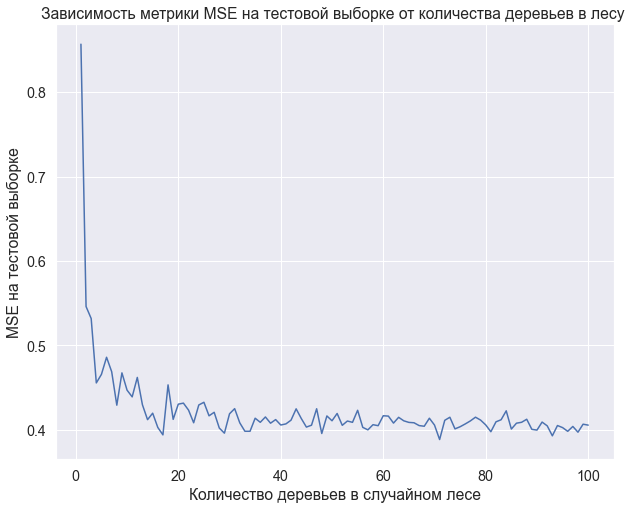

In [257]:
%%time

MSE_n_est = []
n_range = list(range(1,101))
for n in tqdm(n_range):
    rf = RandomForestRegressor(n_estimators=n).fit(X_train, y_train)
    MSE_n_est.append(mean_squared_error(rf.predict(X_test),y_test))
    
MSE_n_est = np.array(MSE_n_est)

plt.figure(figsize=(10, 8))

plt.plot(n_range, MSE_n_est)

plt.title('Зависимость метрики MSE на тестовой выборке от количества деревьев в лесу ')
plt.xlabel('Количество деревьев в случайном лесе')
plt.ylabel('MSE на тестовой выборке')
plt.grid(':')

plt.plot()

  0%|          | 0/23 [00:00<?, ?it/s]

CPU times: user 12 s, sys: 31.7 ms, total: 12 s
Wall time: 12.1 s


[]

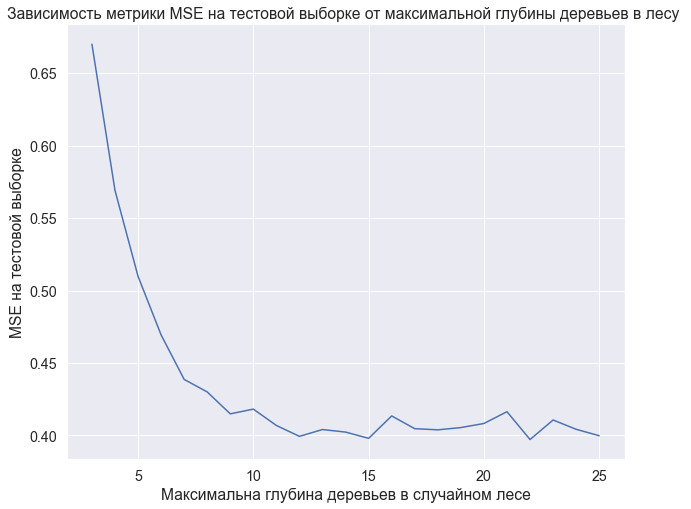

In [242]:
%%time

MSE_max_depth = []
depth = list(range(3,26))
for d in tqdm(depth):
    rf = RandomForestRegressor(max_depth=d).fit(X_train, y_train)
    MSE_max_depth.append(mean_squared_error(rf.predict(X_test),y_test))
    
MSE_max_depth = np.array(MSE_max_depth)

plt.figure(figsize=(10, 8))

plt.plot(depth, MSE_max_depth)

plt.title('Зависимость метрики MSE на тестовой выборке от максимальной глубины деревьев в лесу ')
plt.xlabel('Максимальна глубина деревьев в случайном лесе')
plt.ylabel('MSE на тестовой выборке')
plt.grid(':')

plt.plot()

Основываясь на полученных графиках, ответьте на следующие вопросы.

1. Какие закономерности можно увидеть на построенных графиках? Почему графики получились такими?

2. Как изменяется качество предсказаний с увеличением исследуемых параметров, когда эти параметры уже достаточно большие.

3. В предыдущем задании вы на практике убедились, что решающее дерево начинает переобучаться при достаточно больших значениях максимальной глубины. Справедливо ли это утверждение для случайного леса? Поясните свой ответ, опираясь на своё знание статистики.

**Ответ:** 
1) Чем больше деревьев и чем больше их глубина тем лучше случайный лес работает. Это происходит потому, что основной идеей работы случайного леса является, то что каждое дерево переобучается на своей подвыборке, а потом они все вместе усредняются и получается адекватная модель, поэтому при увеличении глубины и количества деревьев всё становится лучше. 

2) Практический не изменяется. Достигается почти минимальный variance модели и дальнейшее изменение параметров не сильно его меняет.

3) Нет, потому что в среднее значение предсказания по деревьям(благодаря большому количеству деревьев) даёт адекватный результат, т.е. говоря более серьезным языком при переобучении дерево может целевую переменную как сильно завышать(относительно истинного значения), так и сильно принижать. Разные деревья в лесу сделают это по разном, поэтому в среднем выйдет лучше.    

Обучите случайный лес с параметрами по умолчанию и выведите mse на тестовой выборке. Проведите эксперимент 3 раза. Почему результаты отличаются?

In [243]:
for i in tqdm(range(3)):
    rf = RandomForestRegressor().fit(X_train, y_train)
    print(str(i) + '. MSE: ' + str(mean_squared_error(rf.predict(X_test),y_test)))

  0%|          | 0/3 [00:00<?, ?it/s]

0. MSE: 0.41025585628983496
1. MSE: 0.4070187859513641
2. MSE: 0.40123099353632696


**Ответ:** Случайный лес соответствует своему названию :). Если добавить "random_state", то значени будут одинаковыми. Случайность в лесу состоит в том, что деревья обучаются на случайных бутстрепных подвыборках.

Было бы неплохо определиться с тем, какое количество деревьев нужно использовать и какой максимальной глубины они будут. Подберите оптимальные значения `max_depth` и `n_estimators` с помощью кросс-валидации.

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [244]:
parameters_grid = {
    'n_estimators' : np.arange(90, 110),
    'max_depth' : np.arange(35, 45)
}

ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

gs = GridSearchCV(
    # модель для обучения, в нашем случае Ridge
    estimator = RandomForestRegressor(),
    # сетка значений гиперпараметров
    param_grid=parameters_grid,
    # метрика качества, берем MSE
    scoring='neg_mean_squared_error',
    # GridSearch отлично параллелится, указываем количество параллельных джоб
    # -1 означает использование всех ядер
    n_jobs=-1,
    # стратегия кросс-валидации
    cv=ss,
    # сообщения с логами обучения: больше значение - больше сообщений
    verbose=10,
    # значение, присваиваемое scorer в случае ошибки при обучении
    error_score='raise'
)

In [132]:
%%time
# выполняем поиск по сетке
gs.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
CPU times: user 2.13 s, sys: 222 ms, total: 2.35 s
Wall time: 2min 3s


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.25, train_size=None),
             error_score='raise', estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
                         'n_estimators': array([ 90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109])},
             scoring='neg_mean_squared_error', verbose=10)

Выведите найденные оптимальные параметры.

In [133]:
gs.best_estimator_ 

RandomForestRegressor(max_depth=41, n_estimators=95)

Зафиксируем эти оптимальные значения параметров и в дальнейшим будем их использовать.

In [134]:
max_depth = 41
n_estimators = 95

Оценим качество предсказаний обученного решающего леса.

Исследуйте зависимость метрики `mse` от количества признаков, по которым происходит разбиение в вершине дерева. Поскольку количество признаков в датасете не очень большое (их 8), то можно перебрать все возможные варианты количества признаков, использующихся при разбиении вершин.

Не забывайте делать пояснения и выводы!

Постройте график зависимости метрики mse на `test` и `train` в зависимости от числа признаков, использующихся при разбиении в каждой вершине.

  0%|          | 0/8 [00:00<?, ?it/s]

CPU times: user 3.29 s, sys: 7.87 ms, total: 3.29 s
Wall time: 3.28 s


[]

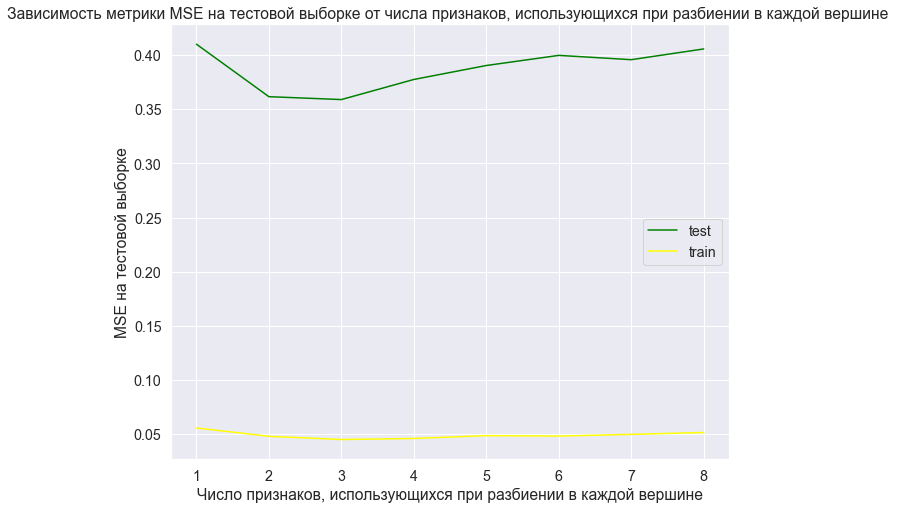

In [245]:
%%time

MSE_test_max_features = []
MSE_train_max_features = []
features = list(range(1,9))
for f in tqdm(features):
    rf = RandomForestRegressor(max_depth=max_depth, n_estimators = n_estimators, max_features=f).fit(X_train, y_train)
    MSE_test_max_features.append(mean_squared_error(rf.predict(X_test),y_test))
    MSE_train_max_features.append(mean_squared_error(rf.predict(X_train),y_train))
    
plt.figure(figsize=(10, 8))

plt.plot(features, MSE_test_max_features, color='green', label='test')

plt.plot(features, MSE_train_max_features, color='yellow', label='train')

plt.title('Зависимость метрики MSE на тестовой выборке от числа признаков, использующихся при разбиении в каждой вершине ')
plt.xlabel('Число признаков, использующихся при разбиении в каждой вершине')
plt.ylabel('MSE на тестовой выборке')
plt.grid(':')
plt.legend()

plt.plot()

Почему график получился таким? Как зависит разнообразие деревьев от величины `n_features`?

**Ответ:** Почти горизонтальная прямая получилось потому, что все признаки значимые в данном датасете и не сильно важно какой признак будет разбивать дерево.Случай при n_features=1 имеет большую MSE, т.к. деревья менее разные. Тоже самое происходит когда деревья разбивают вершины по всем (или почти всем) признакам, поэтому лучшее значние разбиения где-то между. 

Проведите эксперимент, в котором выясните, как изменится качество регрессии, если набор признаков, по которым происходит разбиение в каждой вершине определяется не заново в каждой вершине, а задан заранее для всего дерева. То есть перед каждым построением дерева выбирается новый набор признаков, который будет рассматриваться при построении всех разбиений в этом дереве.

Для реализации данного эксперимента используйте класс беггинг-модели `sklearn.ensemble.BaggingRegressor`, у которого используйте следующие поля:
* `base_estimator` — базовая модель, используйте `sklearn.tree.DecisionTreeRegressor`;
* `max_features` — количество признаков для каждой базовой модели;
* `n_estimators` — количество базовых моделей.

Постройте графики `mse` на обучающей и на валидационной выборке в зависимости от числа рассматриваемых признаков в дереве.

In [138]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

  0%|          | 0/8 [00:00<?, ?it/s]

CPU times: user 421 ms, sys: 4.05 ms, total: 425 ms
Wall time: 421 ms


[]

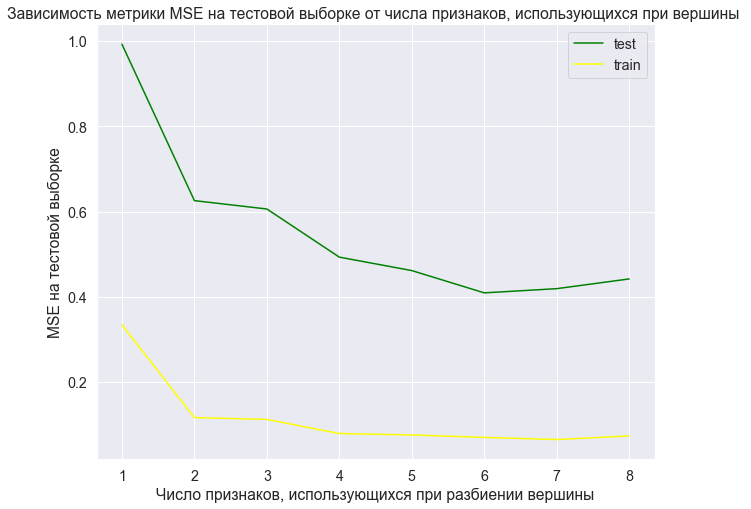

In [246]:
%%time

MSE_test_max_features = []
MSE_train_max_features = []
features = list(range(1,9))
for f in tqdm(features):
    regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_features=f).fit(X_train, y_train)
    MSE_test_max_features.append(mean_squared_error(regr.predict(X_test),y_test))
    MSE_train_max_features.append(mean_squared_error(regr.predict(X_train),y_train))

plt.figure(figsize=(10, 8))

plt.plot(features, MSE_test_max_features, color='green', label='test')

plt.plot(features, MSE_train_max_features, color='yellow', label='train')

plt.title('Зависимость метрики MSE на тестовой выборке от числа признаков, использующихся при вершины ')
plt.xlabel('Число признаков, использующихся при разбиении вершины')
plt.ylabel('MSE на тестовой выборке')
plt.grid(':')
plt.legend()

plt.plot()

Сравните результаты обычного случайного леса с только что построенным лесом.

Сделайте выводы. Объясните, чем плох такой подход пострения случайного леса. Какое преимущество мы получаем, когда выбираем случайное подмножество признаков в каждой вершине в обычном случайном лесу?

**Вывод.**

Из графика видно, что чем больше признаков используется при разбиении вершины, тем лучше. Из этой логики получаем, что лучше всего брать сразу все признаки для разбиения вершин, но это не хорошо по 2 причинам: 1) деревья более одинаковые, 2) при большом количестве признаков нужно производить огромные вычисления. Соответственно этих проблем не имеет случайный лес.

Поясните разницу между следующими конструкциями:

`BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_features=n_features)`

`BaggingRegressor(base_estimator=DecisionTreeRegressor(max_features=n_features))`

В первом случае мы получаем, то что хотим в задаче: задаём количество признаков для каждой базовой модели, т.е. все модели имеют одинаковое количество признаков для разбиения.

А во втором случае мы создаём количество моделей деревьев по умолчанию и позволяем им в каждой брать только n_features на каждом шаге разбиения, т.е. получаем обычный случайный лес.

### Задача 4

На лекции была получена формула bias-variance разложения для беггинга. Проведите эксперимент, в котором выясните, насколько уменьшается разброс (variance-компонента) беггинг-модели на 100 базовых моделях по отношению к одной базовой модели. Используйте данные из предыдущей задачи. Рассмотрите беггинг на следующих базовых моделях:
* решающие деревья, можно использовать вариант случайного леса,
* ридж-регрессия.

Для решения задачи потребуется оценить корреляции предсказаний на тестовой выборке базовых моделей, входящих в состав беггинг-модели. Эти модели можно получить с помощью поля `estimators_` у обученной беггинг-модели. Корреляции моделей можно смотреть по их предсказаниям.

Насколько уменьшается разброс в каждом случае? Для каждого случая постройте также матрицу корреляций предсказаний базовых моделей и гистограмму по ним. Какую оценку коэффициента корреляции вы используете и почему?

**Решающие деревья**

In [145]:
from sklearn.tree import  DecisionTreeRegressor

In [158]:
housing = fetch_california_housing()
X, y = housing.data, housing.target

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Посмотрим на MSE одного дерева на тестовой выборке. Из лекции известно, что MSE = Variance + Bias$^2$ + шум

In [166]:
dtree = DecisionTreeRegressor().fit(X_train, y_train)
tree_MSE = mean_absolute_error(dtree.predict(X_test), y_test)

tree_MSE

0.4646229360465116

Отнимем смещение ,чтобы получить дисперсию модели с точностью до шума.



In [205]:
bias = (dtree.predict(X_test).mean() - y_test.mean())**2
variance_single_tree = tree_MSE  - bias
variance_single_tree

0.4645438010578142

Аналогично сделаем тоже самое со случайным лесом, т.е. со 100 деревьями обученными на беггинге

In [162]:
rf = RandomForestRegressor().fit(X_train, y_train)
rf_MSE = mean_absolute_error(rf.predict(X_test), y_test)
rf_MSE

0.3354608639147289

Также вычтем bias из MSE

In [169]:
bias = (rf.predict(X_test).mean() - y_test.mean())**2
variance_rf = rf_MSE  - bias
variance_rf

0.3354334416339621

Так как Bias это просто смещение, а variance случайного леса равен $$D(\text{random forest}) = \dfrac{1}{T} D(\text{single tree}_1) + \dfrac{T -1 }{T} cov(\text{single tree}_1, \text{single tree}_2) + ...$$ то если отнимем MSE одного дерева от MSE случайного леса, то получим сумму дисперсии одного дерева на сумму совариаций между деревьями умноженную на $\dfrac{T-1}{T}$.

//T --- количество бутстрепных подвыборок

Сначала найдем матрицу корреляций предсказаний базовых моделей.

In [ ]:
y_pred = []
for i in range(100):
    y_pred.append(rf.estimators_[i].predict(X_test))
    
y_pred = np.array(y_pred)

In [229]:
from scipy import stats

In [232]:
corr = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        corr[i,j] = stats.pearsonr(y_pred[i], y_pred[j])[0]
        
corr

array([[ 1.        ,  0.12132978,  0.13538065, ..., -0.09376965,
         0.05517612,  0.09143923],
       [ 0.12132978,  1.        ,  0.11894611, ..., -0.23000653,
         0.01763666, -0.01787524],
       [ 0.13538065,  0.11894611,  1.        , ..., -0.14493627,
        -0.08345553, -0.12732058],
       ...,
       [-0.09376965, -0.23000653, -0.14493627, ...,  1.        ,
         0.02712007, -0.08066132],
       [ 0.05517612,  0.01763666, -0.08345553, ...,  0.02712007,
         1.        , -0.06543679],
       [ 0.09143923, -0.01787524, -0.12732058, ..., -0.08066132,
        -0.06543679,  1.        ]])

In [234]:
cov = np.cov(y_pred)
cov

array([[1.34185896, 1.03188434, 0.98262958, ..., 1.00961618, 1.01599913,
        1.00004231],
       [1.03188434, 1.2948055 , 0.98989704, ..., 1.01399673, 1.02051286,
        0.99837899],
       [0.98262958, 0.98989704, 1.27748644, ..., 0.97171308, 0.97151914,
        0.97412151],
       ...,
       [1.00961618, 1.01399673, 0.97171308, ..., 1.30803664, 1.00519593,
        0.99645575],
       [1.01599913, 1.02051286, 0.97151914, ..., 1.00519593, 1.30906954,
        0.98212773],
       [1.00004231, 0.99837899, 0.97412151, ..., 0.99645575, 0.98212773,
        1.30119453]])

In [186]:
#rf.estimators_

In [209]:
%%time
cov = np.array([[0.0]*100]*100)
for i in range(100):
    x_i = rf.estimators_[i].predict(X_test)
    for j in range(100):
        if (i> j):
            x_j = rf.estimators_[j].predict(X_test)
            cov[i, j] = (x_i*x_j - x_i.mean() * x_j.mean()).sum()/len(x_i)

CPU times: user 5.31 s, sys: 3.61 ms, total: 5.32 s
Wall time: 5.32 s


In [214]:
cov

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.03168436, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.98243915, 0.98970519, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.00942052, 1.01380022, 0.97152477, ..., 0.        , 0.        ,
        0.        ],
       [1.01580223, 1.02031508, 0.97133086, ..., 1.00500112, 0.        ,
        0.        ],
       [0.9998485 , 0.9981855 , 0.97393273, ..., 0.99626264, 0.9819374 ,
        0.        ]])

In [207]:
(cov.sum()+variance_single_tree )/100

51.27378837390674